In [1]:
#Importando as bilbiotecas 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [4]:
#Criando nosso DataFrame
df = pd.read_excel('AdventureWorks.xlsx')
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
#Verificar se temos valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
dtype: int64

In [21]:
pd.options.display.float_format = '{:20,.2f}'.format

In [22]:
#Qual foi a receita total?
df['Valor Venda'].sum()

5984606.1426

In [8]:
#Mutiplicando o Custo unitário com a quantidade para descobrir o Custo de cada venda feita.
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])
df.head(1)


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [19]:
#Subtraindo o Valor de venda com o Custo para descobrir o Lucro em cada venda.

df['Lucro'] = df['Valor Venda'] - df['Custo']
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


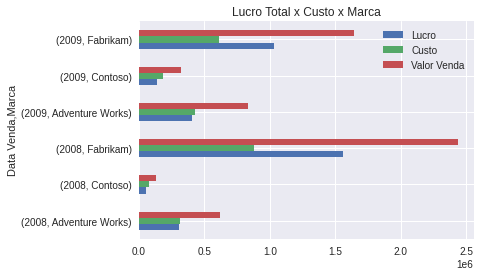

In [181]:
#Resetando o index e o Gráfico com os Lucro/Custo/Valor total de todos os anos
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro','Custo','Valor Venda'].sum().plot.barh(title = 'Lucro Total x Custo x Marca');
plt.xlabel=('Lucro | Custo | Valor Total')
plt.ylabel=('Marca')
plt.savefig('grafico Lucro_Custo_ValorTotal.png')

In [156]:
#Lucro por mes do ano 2008
df_2008.groupby(df_2008['Data Venda'].dt.month)['Lucro'].sum().reset_index()

,Data Venda,Lucro
0,1,"72,633.44"
1,2,"138,956.89"
2,3,"100,646.32"
3,4,"110,316.55"
4,5,"219,766.94"
5,6,"312,484.37"
6,7,"165,717.63"
7,8,"97,024.11"
8,9,"160,624.43"
9,10,"194,786.37"


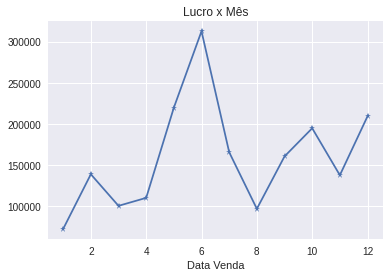

In [182]:
#Lucro por mês gráfico 2008
df_2008.groupby(df_2008['Data Venda'].dt.month)['Lucro'].sum().plot(title= 'Lucro x Mês', marker = '*')
plt.xlabel=('Mês')
plt.ylabel=('Receita')
plt.savefig('grafico ucro_mes2008.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


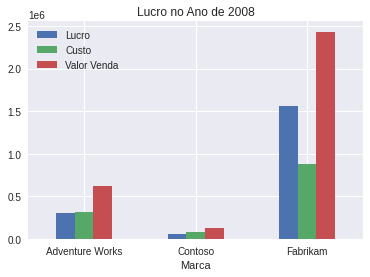

In [183]:
#Gráfico com o Lucro/Custo/Valor total do ano de 2008
f1 = (df['Data Venda'].dt.year == 2008)
df_2008 = df.loc[f1]
df_2008.groupby('Marca')['Lucro','Custo','Valor Venda'].sum().plot.bar(title = 'Lucro no Ano de 2008')
plt.xlabel=('Lucro | Custo | Valor Venda')
plt.ylabel=('Marca')
plt.xticks(rotation='horizontal');
plt.savefig('grafico Lucro_2008.png')

In [153]:
#Lucro por mes do ano 2009
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().reset_index()

,Data Venda,Lucro
0,1,"130,719.04"
1,2,"179,228.92"
2,3,"147,538.25"
3,4,"66,354.39"
4,5,"90,540.00"
5,6,"200,310.41"
6,7,"227,134.51"
7,8,"46,756.42"
8,9,"83,952.62"
9,10,"130,678.05"


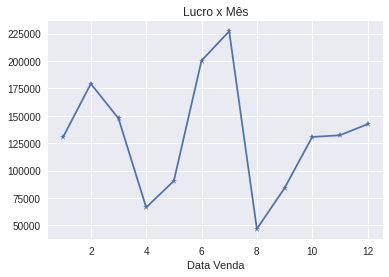

In [184]:
#Lucro por mês gráfico
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title= 'Lucro x Mês', marker = '*')
plt.xlabel=('Mês')
plt.ylabel=('Receita')
plt.savefig('grafico Lucro_mes2009.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


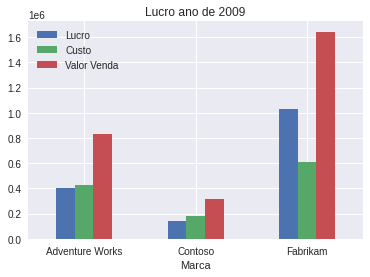

In [185]:
#Gráfico com o Lucro/Custo/Valor total do ano de 2009
f2 = (df['Data Venda'].dt.year == 2009)
df_2009 = df.loc[f2]
df_2009.groupby('Marca')['Lucro','Custo','Valor Venda'].sum().plot.bar(title = 'Lucro ano de 2009')
plt.xlabel=('Lucro | Custo | Valor Venda')
plt.ylabel=('Marca')
plt.xticks(rotation='horizontal');
plt.savefig('grafico Lucro_2009.png')

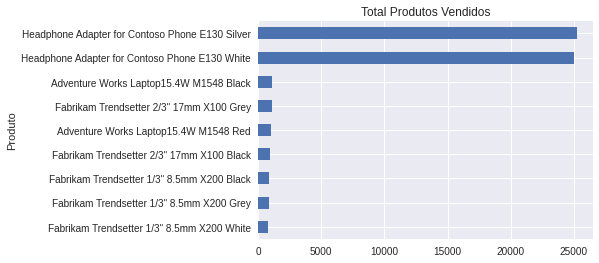

In [186]:
#Gráfico Total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title = 'Total Produtos Vendidos')
plt.xlabel=('Total')
plt.ylabel=('Produto')
plt.savefig('grafico Total Produtos Vendidos.png')

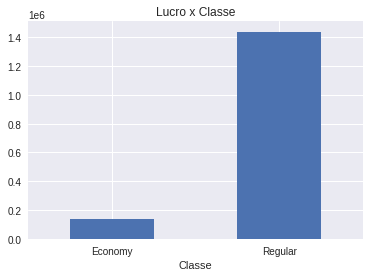

In [187]:
#Gráfico de Lucro feito por Classe
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title = 'Lucro x Classe')
plt.xlabel=('Classe')
plt.ylabel=('Lucro')
plt.xticks(rotation='horizontal');
plt.savefig('grafico Lucro x Classe.png')

TEMPO DE ENVIO

In [164]:
#Extraindo apenas os dias
df['Tempo_Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [167]:
df['Tempo_Envio'].describe().reset_index()

,index,Tempo_Envio
0,count,904.00
1,mean,8.54
2,std,3.06
3,min,4.00
4,25%,6.00
5,50%,9.00
6,75%,11.00
7,max,20.00


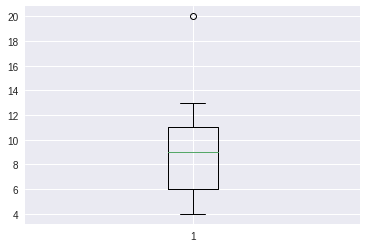

In [168]:
#Gráfico de boxplot
plt.boxplot(df['Tempo_Envio']);


# Vamos tratar de Cliente

In [172]:
#Top 10 Cliente que Mais fizeram Compras
f1 = df.groupby(['ID Cliente']).size().sort_values(ascending=False)
f1.head(10).reset_index()


,ID Cliente,0
0,19060,27
1,19094,22
2,19057,22
3,19052,21
4,19053,18
5,19107,16
6,19054,16
7,19061,16
8,19062,15
9,19111,15


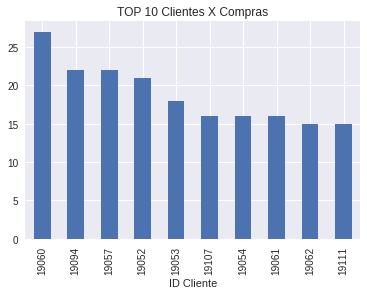

In [188]:
#Gráfico
f1 = df.groupby(['ID Cliente']).size().sort_values(ascending=False)
f1.head(10).plot.bar(title = 'TOP 10 Clientes X Compras')
plt.xlabel=('ID Cliente')
plt.ylabel=('Quantidade de Compras')
plt.savefig('grafico Top10 clientes x compradas.png')

In [175]:
#Cores Preferidas por mais compradas
df['Cor'].value_counts().reset_index()

,index,Cor
0,Black,315
1,Grey,212
2,White,175
3,Red,115
4,Silver,87


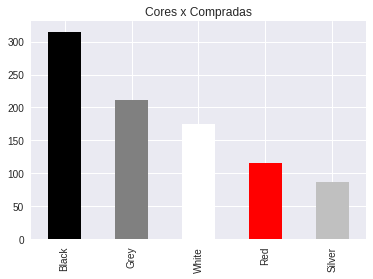

In [189]:
#Gráfico cores
df['Cor'].value_counts().plot.bar(title = 'Cores x Compradas', color =['k','grey','white','red','silver'])
plt.xlabel = ('Cor')
plt.ylabel = ('Quantidade')
plt.savefig('grafico_cores x compradas.png')

SALVANDO DOCUMENTO 

In [176]:
df.to_csv('df.vendas_novo.csv', index=False)